In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter



In [73]:
df = pd.read_csv('who_suicide_statistics.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [82]:
df.head(1499)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
...,...,...,...,...,...,...
1494,Argentina,2015,male,15-24 years,656.0,3500580.0
1495,Argentina,2015,male,25-34 years,465.0,3289927.0
1496,Argentina,2015,male,35-54 years,633.0,5166179.0
1497,Argentina,2015,male,5-14 years,39.0,3672155.0


In [4]:
df.describe()

,year,suicides_no,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


In [5]:
df["suicides_no"] = df["suicides_no"].fillna(0)

In [6]:
df.count()

country        43776
year           43776
sex            43776
age            43776
suicides_no    43776
population     38316
dtype: int64

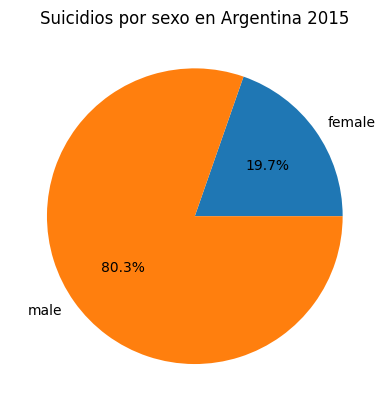

In [7]:
#Un gráfico circular de un solo año. Esto seria algo bueno
dato_2016 = df[(df['year']==2015) & (df['country']=='Argentina')].groupby('sex')['suicides_no'].sum()

plt.pie(
    dato_2016,                 # valores
    labels=dato_2016.index,    # etiquetas (M/F)
    autopct="%1.1f%%"        # mostrar porcentajes
)
plt.title("Suicidios por sexo en Argentina 2015")
plt.show()


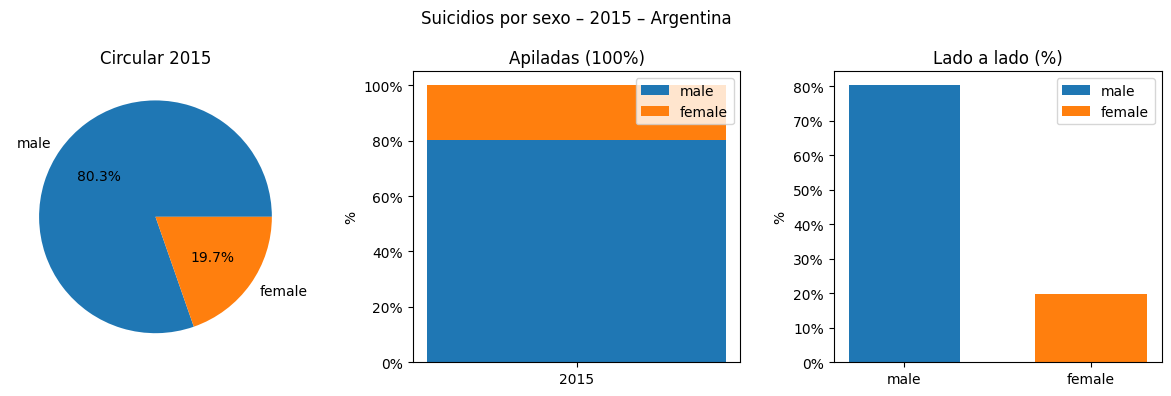

In [8]:
#comparacion, se ve la ventaja de uno sobre otro
anio = 2015
from matplotlib.ticker import PercentFormatter

anio = 2015
serie = (
    df[(df['year']==anio) & (df['country']== 'Argentina')]
    .groupby('sex')['suicides_no'].sum()
    .reindex(['male','female']).fillna(0)
)
total = serie.sum()
p = serie / total  # proporciones

fig, axes = plt.subplots(1, 3, figsize=(12,4))
# Pie (% ya lo muestra autopct)
axes[0].pie(p.values, labels=p.index, autopct='%1.1f%%')
axes[0].set_title(f'Circular {anio}')

# Barras apiladas 100%
axes[1].bar([0], [p['male']], label='male')
axes[1].bar([0], [p['female']], bottom=[p['male']], label='female')
axes[1].set_xticks([0]); axes[1].set_xticklabels([str(anio)])
axes[1].yaxis.set_major_formatter(PercentFormatter(1.0))
axes[1].set_ylabel('%'); axes[1].set_title('Apiladas (100%)'); axes[1].legend()

# Barras lado a lado en %
axes[2].bar([0], [p['male']], width=0.6, label='male')
axes[2].bar([1], [p['female']], width=0.6, label='female')
axes[2].set_xticks([0,1]); axes[2].set_xticklabels(['male','female'])
axes[2].yaxis.set_major_formatter(PercentFormatter(1.0))
axes[2].set_ylabel('%'); axes[2].set_title('Lado a lado (%)'); axes[2].legend()

plt.suptitle(f'Suicidios por sexo – {anio} – Argentina')
plt.tight_layout(); plt.show()


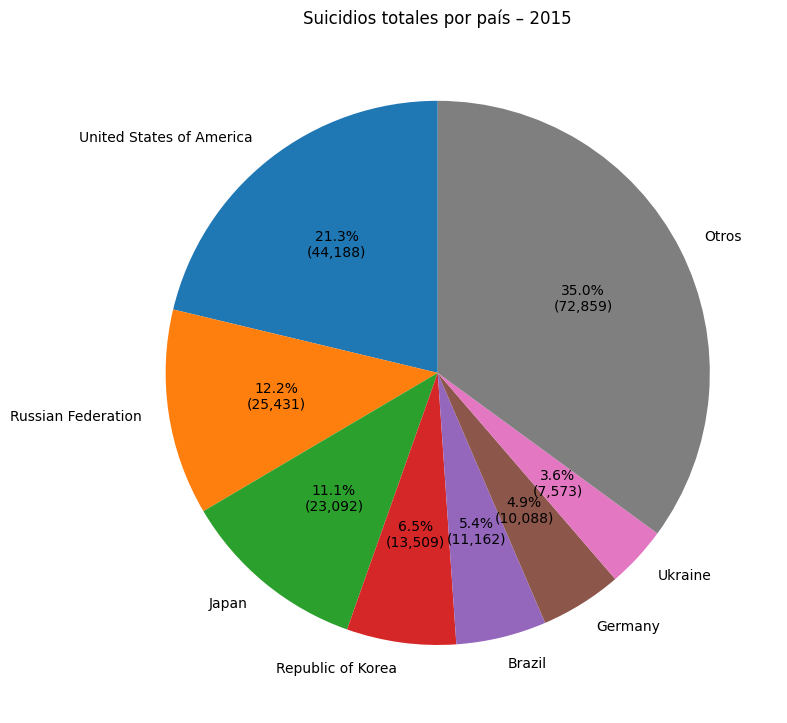

In [23]:


# 2) Tipos y limpieza mínima
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["suicides_no"] = pd.to_numeric(df["suicides_no"], errors="coerce").fillna(0)

# 3) Filtrar 2015 y agregar por país
df2015 = df[df["year"] == 2015].copy()
totales = (
    df2015.groupby("country", as_index=True)["suicides_no"]
    .sum()
    .sort_values(ascending=False)
)
totales = totales[totales > 0]  # opcional: quitar países con 0

# 4) Pie chart (top 10 + 'Otros')
top_n = 7
top = totales.head(top_n)
otros = totales.iloc[top_n:].sum()

labels = list(top.index) + (["Otros"] if otros > 0 else [])
sizes = list(top.values) + ([otros] if otros > 0 else [])

plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct=lambda p: f"{p:.1f}%\n({int(p*sum(sizes)/100):,})",
    startangle=90
)
plt.title("Suicidios totales por país – 2015")
plt.tight_layout()
plt.show()



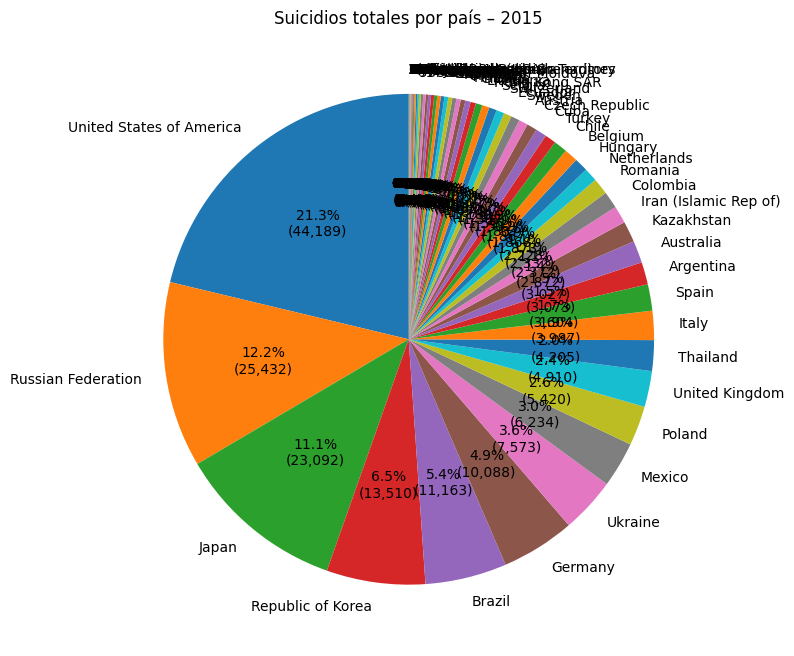

In [14]:
# 2) Tipos y limpieza mínima
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["suicides_no"] = pd.to_numeric(df["suicides_no"], errors="coerce").fillna(0)

# 3) Filtrar 2015 y agregar por país
df2015 = df[df["year"] == 2015].copy()
totales = (
    df2015.groupby("country", as_index=True)["suicides_no"]
    .sum()
    .sort_values(ascending=False)
)
totales = totales[totales > 0]  # opcional: quitar países con 0

# 4) Pie chart (top 10 + 'Otros')
top_n = 10
top = totales.head(top_n)
otros = totales.iloc[top_n:].sum()

labels = totales.index.tolist()
sizes = totales.values.tolist()

plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct=lambda p: f"{p:.1f}%\n({int(p*sum(sizes)/100):,})",
    startangle=90
)
plt.title("Suicidios totales por país – 2015")
plt.tight_layout()
plt.show()



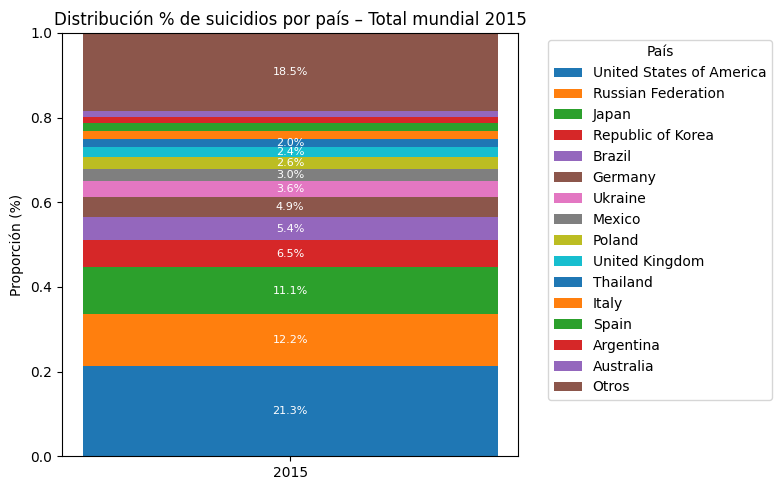

In [24]:
# 2) Limpieza mínima
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["suicides_no"] = pd.to_numeric(df["suicides_no"], errors="coerce").fillna(0)

# 3) Filtrar 2015 y sumar suicidios por país
df2015 = df[df["year"] == 2015].copy()
totales = df2015.groupby("country")["suicides_no"].sum().sort_values(ascending=False)

# 4) Calcular proporciones (cada país como % del total)
prop = totales / totales.sum()

# (Opcional) quedarnos con los 15 países principales y agrupar el resto en "Otros"
top_n = 15
top = prop.head(top_n)
otros = prop.iloc[top_n:].sum()
if otros > 0:
    top["Otros"] = otros

# 5) Graficar barra única apilada
fig, ax = plt.subplots(figsize=(8, 5))

bottom = 0
for pais, valor in top.items():
    ax.bar("2015", valor, bottom=bottom, label=pais)
    # anotar el porcentaje en el centro de cada segmento (si es significativo)
    if valor > 0.02:  # solo si >2%
        ax.text("2015", bottom + valor/2, f"{valor:.1%}", 
                ha="center", va="center", color="white", fontsize=8)
    bottom += valor

ax.set_ylim(0, 1)
ax.set_ylabel("Proporción (%)")
ax.set_title("Distribución % de suicidios por país – Total mundial 2015")
ax.legend(title="País", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

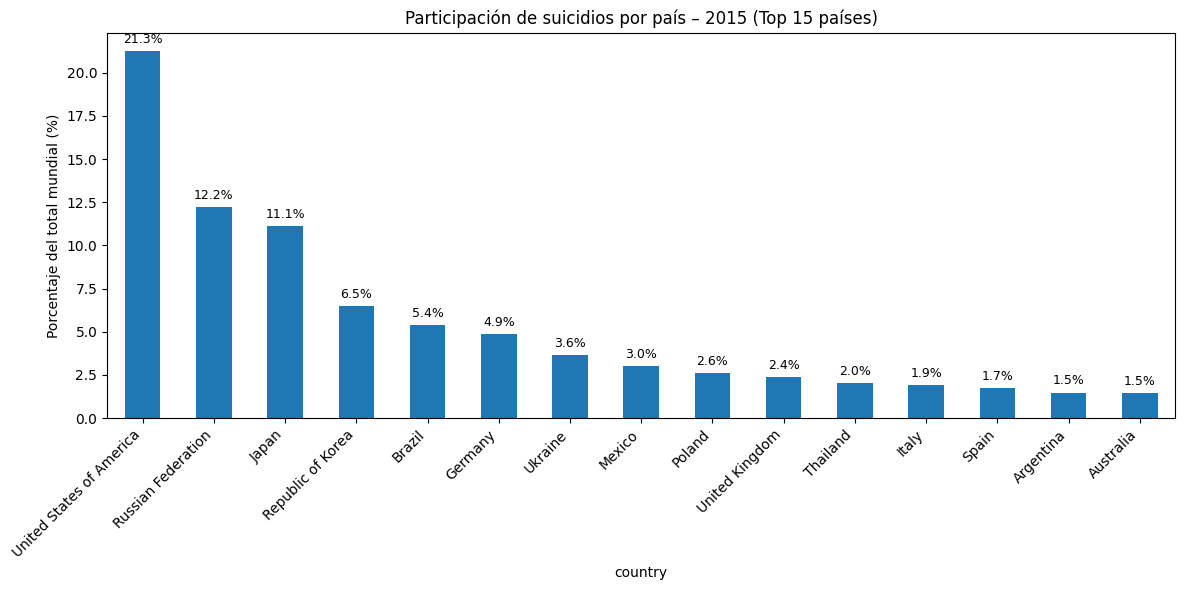

In [25]:
# 2) Limpieza mínima
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["suicides_no"] = pd.to_numeric(df["suicides_no"], errors="coerce").fillna(0)

# 3) Filtrar 2015 y sumar por país
df2015 = df[df["year"] == 2015].copy()
totales = df2015.groupby("country")["suicides_no"].sum().sort_values(ascending=False)

# 4) Convertir a porcentaje del total mundial
prop = totales / totales.sum() * 100

# 5) Seleccionar top 15 países
top15 = prop.head(15)

# 6) Gráfico de barras (en %)
plt.figure(figsize=(12,6))
top15.plot(kind="bar")
plt.ylabel("Porcentaje del total mundial (%)")
plt.title("Participación de suicidios por país – 2015 (Top 15 países)")
plt.xticks(rotation=45, ha="right")

# anotar los porcentajes sobre cada barra
for i, v in enumerate(top15):
    plt.text(i, v + 0.3, f"{v:.1f}%", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

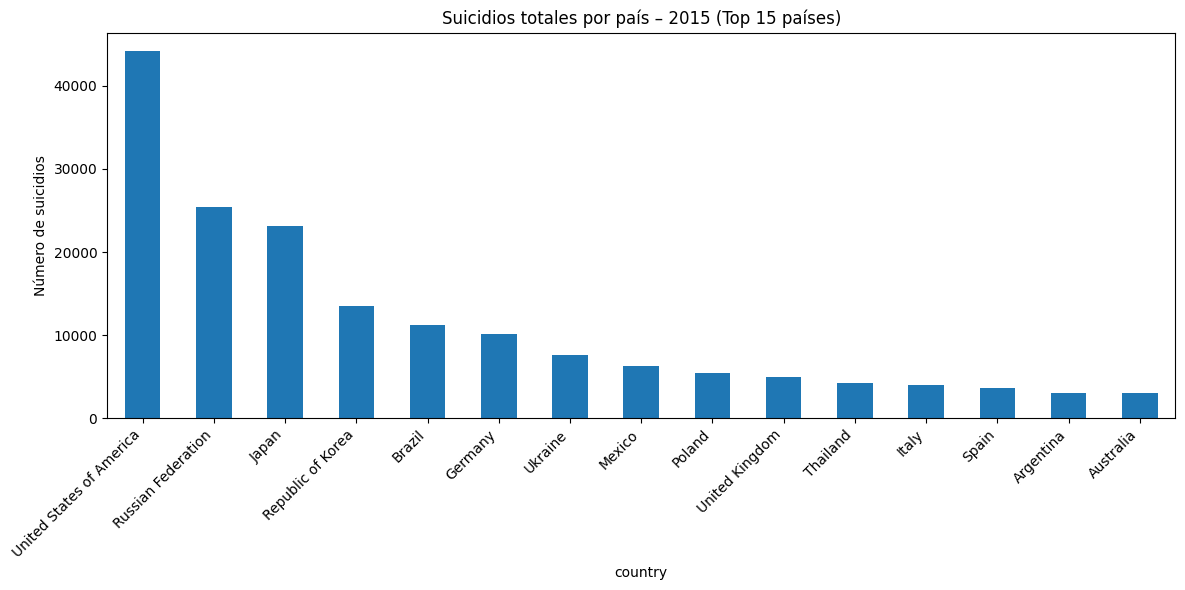

In [20]:

# 2) Tipos y limpieza mínima
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["suicides_no"] = pd.to_numeric(df["suicides_no"], errors="coerce").fillna(0)

# 3) Filtrar 2015 y sumar H+M por país
df2015 = df[df["year"] == 2015].copy()
totales = (
    df2015.groupby("country")["suicides_no"]
    .sum()
    .sort_values(ascending=False)
)

# 4) Tomar top 15 países
top = totales.head(15)

# 5) Gráfico de barras
plt.figure(figsize=(12,6))
top.plot(kind="bar")
plt.ylabel("Número de suicidios")
plt.title("Suicidios totales por país – 2015 (Top 15 países)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [69]:
df.columns = df.columns.str.strip().str.lower()
df["country"] = df["country"].astype(str).str.strip()

# filtrar solo Argentina
arg = df[df["country"].str.casefold() == "argentina"].copy()

print(arg)

        country  year     sex  age  suicides_no  population
1428  Argentina  2010  female  NaN        150.0   3358103.0
1429  Argentina  2010  female  NaN        101.0   3210247.0
1430  Argentina  2010  female  NaN        162.0   4804030.0
1431  Argentina  2010  female  NaN         20.0   3450419.0
1432  Argentina  2010  female  NaN         99.0   3212253.0
...         ...   ...     ...  ...          ...         ...
1495  Argentina  2015    male  NaN        465.0   3289927.0
1496  Argentina  2015    male  NaN        633.0   5166179.0
1497  Argentina  2015    male  NaN         39.0   3672155.0
1498  Argentina  2015    male  NaN        431.0   3011963.0
1499  Argentina  2015    male  NaN        245.0    712691.0

[72 rows x 6 columns]


In [68]:
df.columns = df.columns.str.strip().str.lower()
df["country"] = df["country"].astype(str).str.strip()

# filtrar solo Estados Unidos
usa = df[df["country"].str.casefold() == "united states"].copy()

print(usa)

Empty DataFrame
Columns: [country, year, sex, age, suicides_no, population]
Index: []


In [85]:

# normalizar
df.columns = df.columns.str.strip().str.lower()
df["country"] = df["country"].astype(str).str.strip()
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["suicides_no"] = pd.to_numeric(df["suicides_no"], errors="coerce").fillna(0)

# filtrar Argentina 2015
dfa = df[(df["country"]=="Argentina") & (df["year"]==2015)].copy()

# agrupar por rango etario
totales_age = dfa.groupby("age")["suicides_no"].sum().sort_index()
totales_age

age
15-24 years    809.0
25-34 years    579.0
35-54 years    799.0
5-14 years      58.0
55-74 years    556.0
75+ years      272.0
Name: suicides_no, dtype: float64

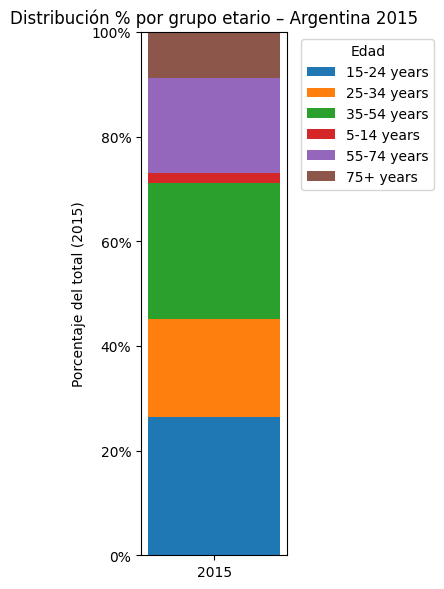

In [86]:
df.columns = df.columns.str.strip().str.lower()
df["country"] = df["country"].astype(str).str.strip()
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["suicides_no"] = pd.to_numeric(df["suicides_no"], errors="coerce").fillna(0)

# --- filtrar Argentina 2015 ---
dfa = df[(df["country"]=="Argentina") & (df["year"]==2015)].copy()

# --- agrupar por rango etario ---
totales = dfa.groupby("age")["suicides_no"].sum()

# --- proporciones ---
prop = totales / totales.sum()

# --- gráfico: barra única 100% apilada ---
fig, ax = plt.subplots(figsize=(4,6))
bottom = 0
for age, val in prop.items():
    ax.bar("2015", val, bottom=bottom, label=age)
    bottom += val

ax.set_ylim(0,1)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.set_ylabel("Porcentaje del total (2015)")
ax.set_title("Distribución % por grupo etario – Argentina 2015")
ax.legend(title="Edad", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()

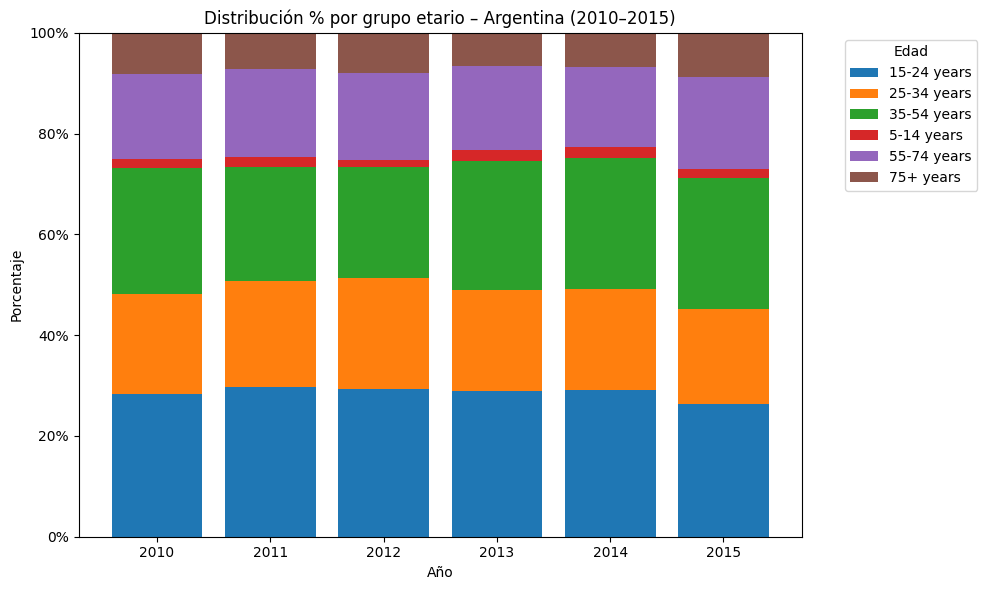

In [87]:
df.columns = df.columns.str.strip().str.lower()

df["country"] = df["country"].astype(str).str.strip()
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["suicides_no"] = pd.to_numeric(df["suicides_no"], errors="coerce").fillna(0)

# --- filtrar Argentina 2010–2015 ---
dfa = df[(df["country"]=="Argentina") & (df["year"].between(2010,2015))].copy()

# --- agrupar por año y edad ---
tabla = (
    dfa.groupby(["year","age"])["suicides_no"]
       .sum()
       .unstack(fill_value=0)
       .sort_index()
)

# --- convertir a proporciones (cada año = 100%) ---
prop = tabla.div(tabla.sum(axis=1), axis=0)

# --- gráfico: barras apiladas por año ---
fig, ax = plt.subplots(figsize=(10,6))
bottom = np.zeros(len(prop))
x = prop.index.astype(str)

for col in prop.columns:
    ax.bar(x, prop[col].values, bottom=bottom, label=col)
    bottom += prop[col].values

ax.set_ylim(0,1)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.set_ylabel("Porcentaje")
ax.set_xlabel("Año")
ax.set_title("Distribución % por grupo etario – Argentina (2010–2015)")
ax.legend(title="Edad", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()

C:\Users\vicen\AppData\Local\Temp\ipykernel_18168\201515588.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfa.groupby(["year","age"])["suicides_no"]


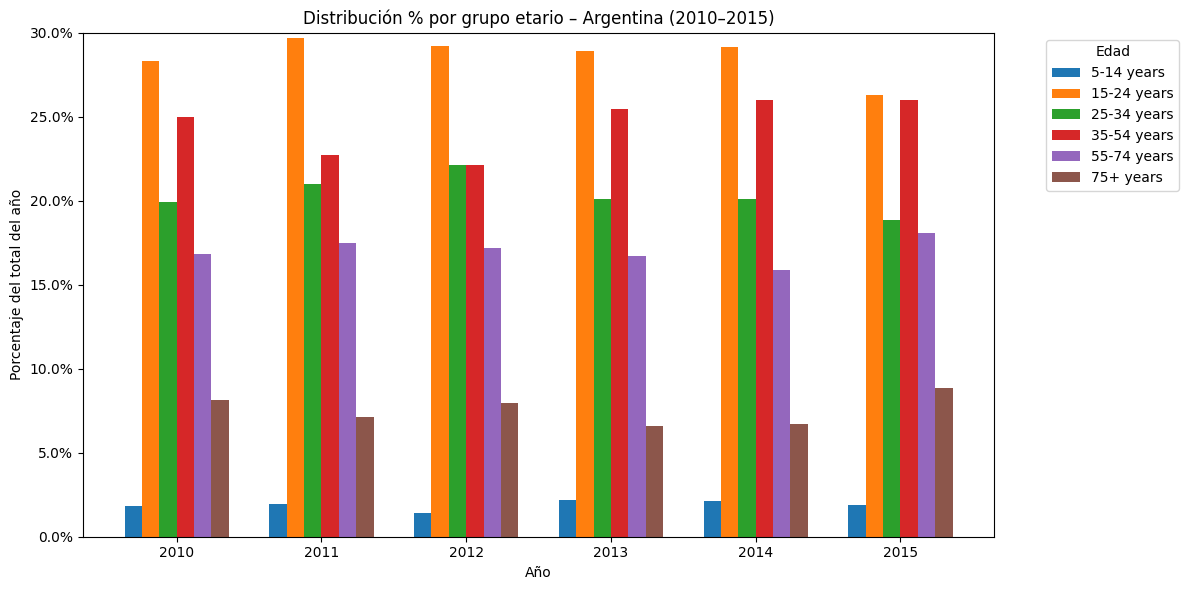

In [90]:
df.columns = df.columns.str.strip().str.lower()

df["country"] = df["country"].astype(str).str.strip()
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["suicides_no"] = pd.to_numeric(df["suicides_no"], errors="coerce").fillna(0)

# filtrar Argentina 2010–2015
dfa = df[(df["country"]=="Argentina") & (df["year"].between(2010, 2015))].copy()
dfa = dfa.dropna(subset=["age"])

# ordenar rangos etarios
age_order = ["5-14 years","15-24 years","25-34 years","35-54 years","55-74 years","75+ years"]
dfa["age"] = pd.Categorical(dfa["age"], categories=age_order, ordered=True)

# totales por año x edad -> proporciones
tabla = (
    dfa.groupby(["year","age"])["suicides_no"]
       .sum()
       .unstack(fill_value=0)
       .sort_index()
)
prop = tabla.div(tabla.sum(axis=1), axis=0)

# --- plot grouped bars ---
years = prop.index
ages = prop.columns
x = np.arange(len(years))
width = 0.12

colors = ["#1f77b4","#ff7f0e","#2ca02c","#d62728","#9467bd","#8c564b"]

fig, ax = plt.subplots(figsize=(12,6))

for i, age in enumerate(ages):
    ax.bar(x + i*width, prop[age], width, label=age, color=colors[i])

ax.set_xticks(x + width*(len(ages)-1)/2)
ax.set_xticklabels(years)

# eje Y de 0% a 30%
ax.set_ylim(0, 0.30)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

ax.set_ylabel("Porcentaje del total del año")
ax.set_xlabel("Año")
ax.set_title("Distribución % por grupo etario – Argentina (2010–2015)")
ax.legend(title="Edad", bbox_to_anchor=(1.05,1), loc="upper left")

plt.tight_layout()
plt.show()

In [94]:
df.columns = df.columns.str.strip().str.lower()

df["sex"] = df["sex"].astype(str).str.strip().str.lower()
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["suicides_no"] = pd.to_numeric(df["suicides_no"], errors="coerce").fillna(0)

# filtrar 2015 y agrupar por sexo
totales_2015 = (
    df[df["year"]==2015]
    .groupby("sex")["suicides_no"]
    .sum()
)

print("Totales de suicidios por sexo en 2015:")
print(totales_2015)

Totales de suicidios por sexo en 2015:
sex
female     48526.0
male      159382.0
Name: suicides_no, dtype: float64
